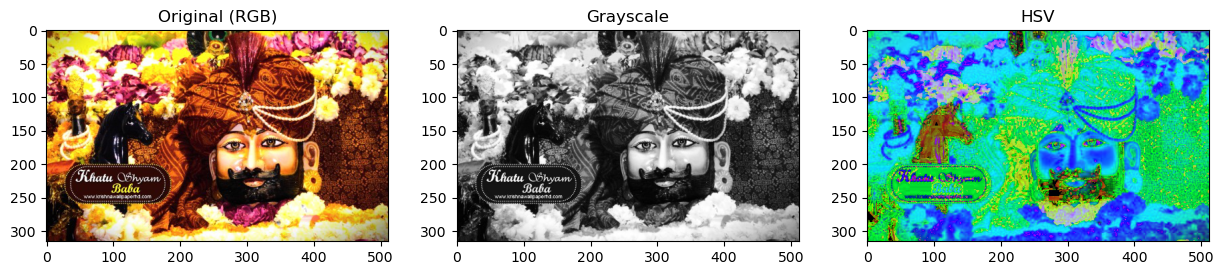

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load color image
img = cv2.imread('image.jpg') # Replace with your file path 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. Conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 3. Display side by side 
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.imshow(img_rgb); plt.title('Original (RGB)')
plt.subplot(1, 3, 2); plt.imshow(gray, cmap='gray'); plt.title('Grayscale')
plt.subplot(1, 3, 3); plt.imshow(hsv); plt.title('HSV')
plt.show()
# Historically, BGR was the standard for early camera manufacturers and software developers (like those of Windows and the original OpenCV creators).

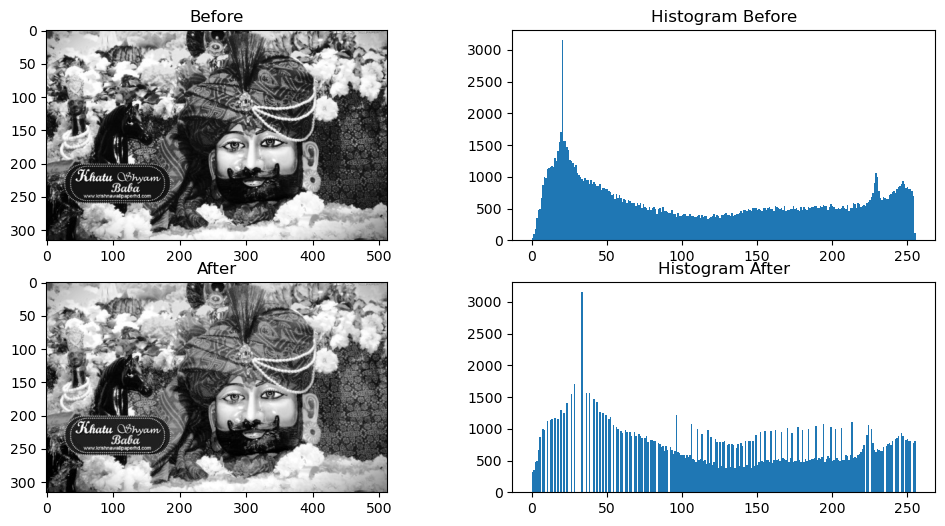

In [3]:
# Apply Equalization
equalized = cv2.equalizeHist(gray)

# Plottingplt.subplot(2, 2, 1); plt.imshow(gray, cmap='gray'); plt.title('Before')
plt.subplot(2, 2, 2); plt.hist(gray.ravel(), 256, [0, 256]); plt.title('Histogram Before')
plt.subplot(2, 2, 3); plt.imshow(equalized, cmap='gray'); plt.title('After')
plt.subplot(2, 2, 4); plt.hist(equalized.ravel(), 256, [0, 256]); plt.title('Histogram After')
plt.figure(figsize=(12, 6))
plt.show()

In [ ]:
#Observation: The 2nd image looks good(reduced contrast) leading to a balanced image.
#Limitation: It is not useful for images that are already well-balanced.

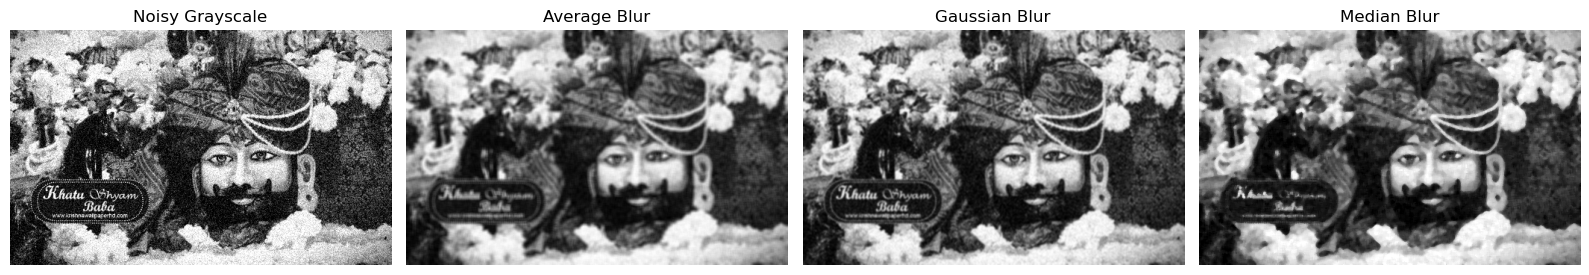

In [14]:
img = cv2.imread('image.jpg')   # replace with your path
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
noise = np.random.normal(0, 25, gray.shape)
noisy_img = gray + noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
avg_blur = cv2.blur(noisy_img, (5, 5))
gauss_blur = cv2.GaussianBlur(noisy_img, (5, 5), 0)
median_blur = cv2.medianBlur(noisy_img, 5)
titles = ['Noisy Grayscale', 'Average Blur', 'Gaussian Blur', 'Median Blur']
images = [noisy_img, avg_blur, gauss_blur, median_blur]

plt.figure(figsize=(16, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
# Averaging-based filters smooth everything, while median filtering removes noise the best without blurring sharp edges.

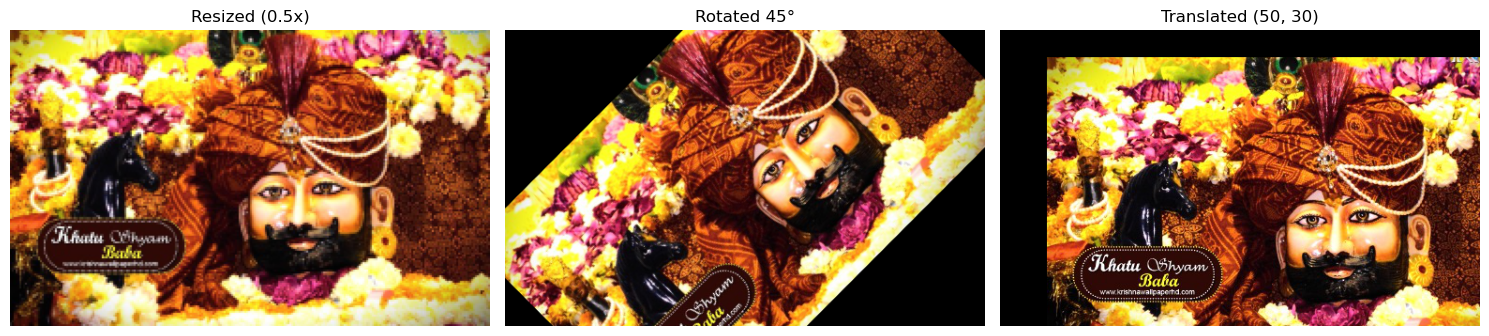

In [16]:
# Load original color image
img_bgr = cv2.imread('image.jpg')
rows, cols = img_bgr.shape[:2]

resized = cv2.resize(img_bgr, (0,0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

center = (cols/2, rows/2)
rot_matrix = cv2.getRotationMatrix2D(center, 45, 1)
rotated = cv2.warpAffine(img_bgr, rot_matrix, (cols, rows))

trans_matrix = np.float32([[1, 0, 50], [0, 1, 30]])
translated = cv2.warpAffine(img_bgr, trans_matrix, (cols, rows))

def fix_color(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(fix_color(resized))
plt.title('Resized (0.5x)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(fix_color(rotated))
plt.title('Rotated 45°')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(fix_color(translated))
plt.title('Translated (50, 30)')
plt.axis('off')

plt.tight_layout()
plt.show()
#Black region occurs beacause transformation moves existing pixels to new coordinates, leaving "undefined" areas in the frame where no original image data exists.

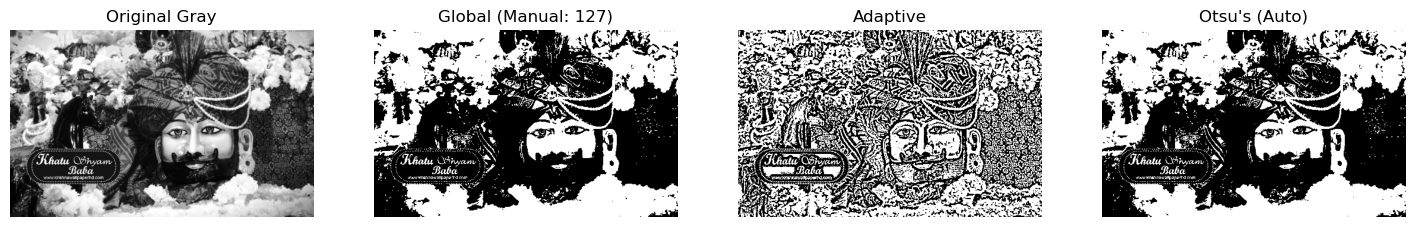

In [6]:
img = cv2.imread('image.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th_global = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
th_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
ret, th_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display Results
titles = ['Original Gray', 'Global (Manual: 127)', 'Adaptive', "Otsu's (Auto)"]
images = [gray, th_global, th_adaptive, th_otsu]

plt.figure(figsize=(18, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()
#Otsu’s thresholding works best for images with clear contrast because it minimizes variance between the foreground and background. 
#However, if the lighting is uneven (e.g., a shadow across a page), Adaptive thresholding works best because it calculates different thresholds for different small regions of the image.
#Global thresholding fails in uneven lighting conditions. If one side of an image is brightly lit and the other is in shadow which will lead to losing details in both regions

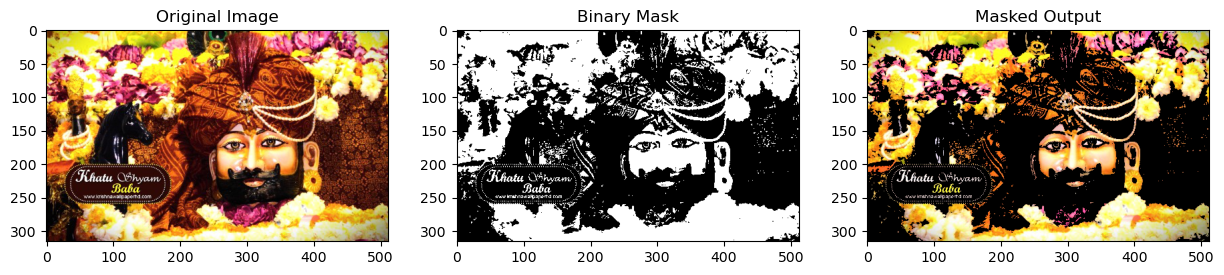

In [9]:
# 1. Load color image
img_bgr = cv2.imread('image.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
masked_output = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.imshow(img_rgb); plt.title('Original Image')
plt.subplot(1, 3, 2); plt.imshow(mask, cmap='gray'); plt.title('Binary Mask')
plt.subplot(1, 3, 3); plt.imshow(masked_output); plt.title('Masked Output')
plt.show()
#Threshold classify every pixel into one of two categories based on its intensity by setting a cutoff and hence deciding wether it belongs to forground/background.

In [1]:
#Thresholding a noisy(raw) image leads to holes in the pixels. Smoothing acts as a low-pass filter that averages out these tiny fluctuations.
#In the RGB space, color and brightness are mixed across all three channels. If R, G, and B values all change drastically, making it hard to "catch" with a single filter. In HSV, the color is isolated in the Hue channel and brightness by value channel. This allows segment an object by its color while ignoring shadows making segmentation much more robust to lighting changes.
#equalization can amplify background noise or subtle textures, making them as bright as the foreground.
#built-in function can be 100x to 1000x faster than a for loop in Python.Eg- OpenCV's built-in functions (like cv2.threshold) are written in highly optimized

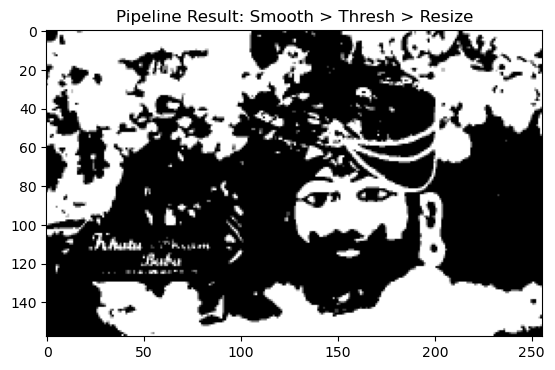

In [4]:
import cv2
import matplotlib.pyplot as plt

# Pipeline: Read -> Smooth -> Threshold -> Transform -> Display
img = cv2.imread('image.jpg', 0) # Read as Grayscale
smoothed = cv2.GaussianBlur(img, (5, 5), 0)

# 2. Threshold (Otsu)
ret, thresh = cv2.threshold(smoothed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 3. Geometric Transform (Resize to 50%)
final_pipe = cv2.resize(thresh, (0,0), fx=0.5, fy=0.5)

# 4. Display
plt.imshow(final_pipe, cmap='gray')
plt.title("Pipeline Result: Smooth > Thresh > Resize")
plt.show()